In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#  Data cleaning and preparation

* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [2]:
df = pd.read_csv('credit_scoring_data.csv')

df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [5]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [3]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df['status'] = df['status'].replace(status_values)


df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df['status'] = df['status'].replace(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999.0, value = np.nan )

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [8]:
df = df[df.status != 'unk'].reset_index(drop = True)

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

In [14]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# Decision Tree

* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

In [15]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] >= 6000:
            return 'ok'
        else:
            return 'default'
        

In [16]:
xi = df_train.iloc[0]

In [17]:
assess_risk(xi)

'ok'

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [19]:
train_dicts = df_train.fillna(0).to_dict(orient='records')


In [20]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [23]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6610308541812986

In [24]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [25]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [27]:
from sklearn.tree import export_text

In [28]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

In [29]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [30]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [31]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

for feature, Ts in thresholds.items():
    print('#################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


# Decision Tree Parameter Tunning

* selecting max_depth
* selecting min_samples_leaf

In [32]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train) 
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.754
  10 -> 0.685
  15 -> 0.658
  20 -> 0.649
None -> 0.646


In [33]:
scores = []

depths = [4, 5, 6]
for depth in depths:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        
        dt = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = s)
        dt.fit(X_train, y_train) 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((depth, s, auc))

In [34]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766938
9,5,5,0.768173


In [35]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.753
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

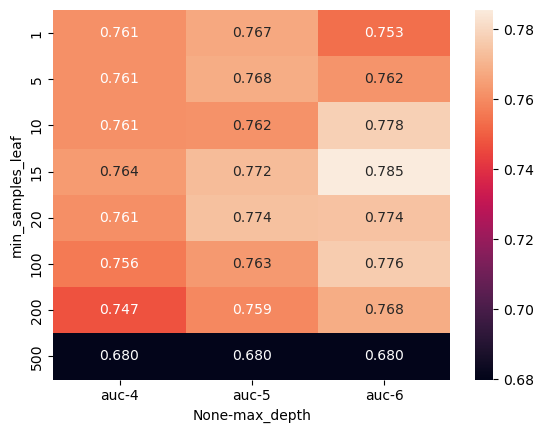

In [36]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [37]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [38]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

# Ensembles and random forest
* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [41]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

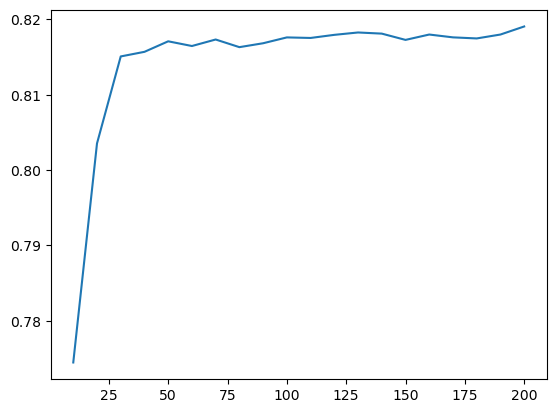

In [42]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [ ]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))
        
        
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
max_depth = 10
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
min_samples_leaf = 3
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

Other useful parametes:

* max_features
* bootstrap


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Gradient boosting and XGBoost

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output

In [129]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [130]:
import xgboost as xgb

In [131]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [132]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [133]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [134]:
watchlist = [(dtrain, 'train'),(dval,'val')]

In [135]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

In [136]:
s = output.stdout


In [137]:
line = s.split('\n')[0]

In [138]:
num_iter, train_auc, val_auc = line.split('\t')

In [139]:
num_iter.strip('[]')

'0'

In [140]:
train_auc.split(':')[0]

'train-auc'

In [141]:
float(train_auc.split(':')[1])

0.8673

In [142]:
float(val_auc.split(':')[1])

0.77938

In [143]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        iter_line, train_line, val_line = line.split('\t')
        itr = int(iter_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((itr, train, val))
    columns = ['num_iter', 'auc_train', 'auc_val']
    df_results = pd.DataFrame(results, columns = columns)
    return df_results

In [144]:
df_score = parse_xgb_output(output)

In [145]:
df_score

,num_iter,auc_train,auc_val
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


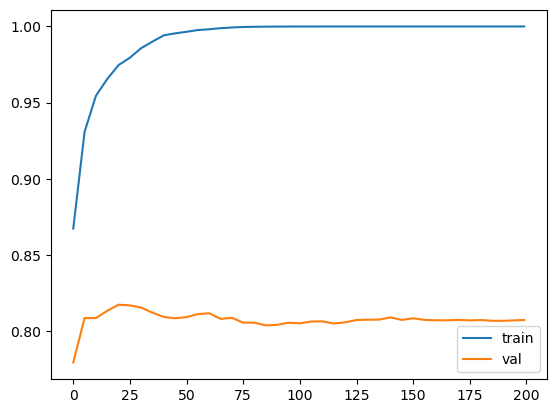

In [146]:
plt.plot(df_score.num_iter, df_score.auc_train, label = 'train' )
plt.plot(df_score.num_iter, df_score.auc_val, label = 'val' )
plt.legend()

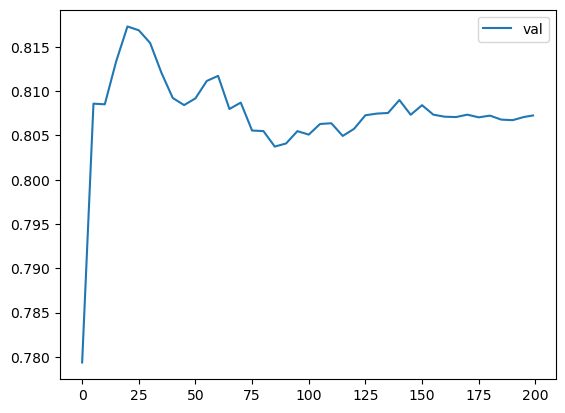

In [147]:
plt.plot(df_score.num_iter, df_score.auc_val, label='val')
plt.legend()

# XGBoost parameter tuning
Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [148]:
scores = {}

In [149]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

In [150]:
key = 'eta=%s' % (xgb_params['eta'])

In [151]:
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.05'])

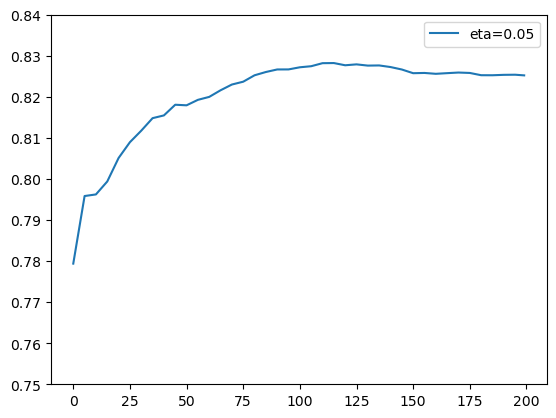

In [152]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.auc_val, label = key)
    plt.ylim(.75,.84)
plt.legend()

In [153]:
scores={}

In [154]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

In [155]:
key = 'max_depth=%s' % (xgb_params['max_depth'])

scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=15'])

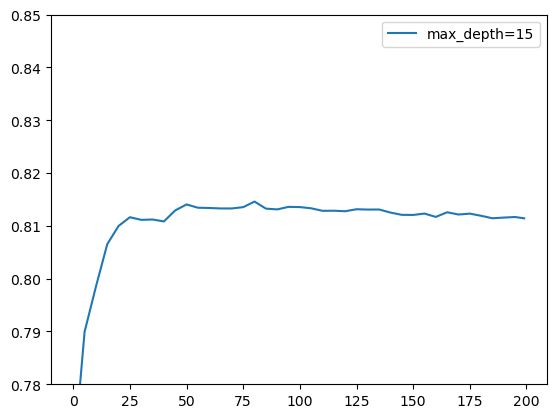

In [156]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.auc_val, label = max_depth)
plt.ylim(.78,.85)
plt.legend()

In [157]:
scores = {}

In [158]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 38,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

In [159]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])

scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=38'])

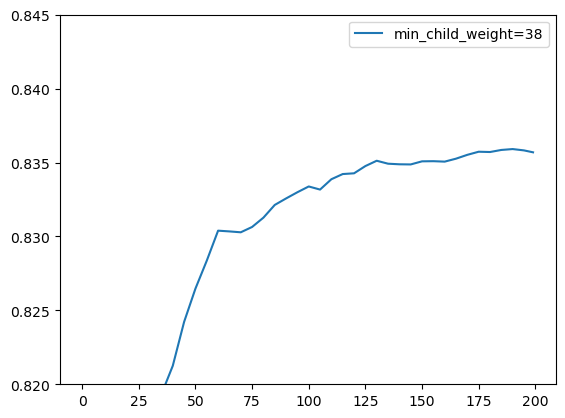

In [160]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.auc_val, label = min_child_weight)
plt.ylim(.82,.845)
plt.legend()

In [161]:
# Final Model:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

[0]	train-auc:0.76455	val-auc:0.73369
[5]	train-auc:0.82689	val-auc:0.77398
[10]	train-auc:0.84376	val-auc:0.79435
[15]	train-auc:0.85530	val-auc:0.80579
[20]	train-auc:0.86049	val-auc:0.81030
[25]	train-auc:0.86624	val-auc:0.81448
[30]	train-auc:0.87145	val-auc:0.81905
[35]	train-auc:0.87507	val-auc:0.82076
[40]	train-auc:0.87690	val-auc:0.82313
[45]	train-auc:0.87887	val-auc:0.82504
[50]	train-auc:0.88031	val-auc:0.82576
[55]	train-auc:0.88207	val-auc:0.82798
[60]	train-auc:0.88345	val-auc:0.82945
[65]	train-auc:0.88471	val-auc:0.83014
[70]	train-auc:0.88596	val-auc:0.83073
[75]	train-auc:0.88735	val-auc:0.83165
[80]	train-auc:0.88832	val-auc:0.83254
[85]	train-auc:0.88942	val-auc:0.83324
[90]	train-auc:0.89024	val-auc:0.83380
[95]	train-auc:0.89118	val-auc:0.83437
[100]	train-auc:0.89204	val-auc:0.83463
[105]	train-auc:0.89285	val-auc:0.83504
[110]	train-auc:0.89363	val-auc:0.83575
[115]	train-auc:0.89419	val-auc:0.83591
[120]	train-auc:0.89519	val-auc:0.83618
[125]	train-auc:0.8957

# Selecting Final Model:

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

In [162]:
# Final Decision Tree

dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [163]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7850802838390931

In [164]:
# Final Random Forest

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [165]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8286218546414472

In [166]:
# final XGBoost
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

[0]	train-auc:0.76455	val-auc:0.73369
[5]	train-auc:0.82689	val-auc:0.77398
[10]	train-auc:0.84376	val-auc:0.79435
[15]	train-auc:0.85530	val-auc:0.80579
[20]	train-auc:0.86049	val-auc:0.81030
[25]	train-auc:0.86624	val-auc:0.81448
[30]	train-auc:0.87145	val-auc:0.81905
[35]	train-auc:0.87507	val-auc:0.82076
[40]	train-auc:0.87690	val-auc:0.82313
[45]	train-auc:0.87887	val-auc:0.82504
[50]	train-auc:0.88031	val-auc:0.82576
[55]	train-auc:0.88207	val-auc:0.82798
[60]	train-auc:0.88345	val-auc:0.82945
[65]	train-auc:0.88471	val-auc:0.83014
[70]	train-auc:0.88596	val-auc:0.83073
[75]	train-auc:0.88735	val-auc:0.83165
[80]	train-auc:0.88832	val-auc:0.83254
[85]	train-auc:0.88942	val-auc:0.83324
[90]	train-auc:0.89024	val-auc:0.83380
[95]	train-auc:0.89118	val-auc:0.83437
[100]	train-auc:0.89204	val-auc:0.83463
[105]	train-auc:0.89285	val-auc:0.83504
[110]	train-auc:0.89363	val-auc:0.83575
[115]	train-auc:0.89419	val-auc:0.83591
[120]	train-auc:0.89519	val-auc:0.83618
[125]	train-auc:0.8957

In [167]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8359721246760795

In [207]:
# use final model

In [208]:
df_full_train = df_full_train.reset_index(drop = True)

In [209]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [210]:
del df_full_train['status']

In [211]:
dict_full_train = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)

X_full_train = dv.fit_transform(dict_full_train)

In [212]:
dict_test = df_test.to_dict(orient = 'records')
X_test = dv.fit_transform(dict_test)

In [213]:
features = dv.feature_names_
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [214]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

[0]	train-auc:0.76455	val-auc:0.73369
[5]	train-auc:0.82689	val-auc:0.77398
[10]	train-auc:0.84376	val-auc:0.79435
[15]	train-auc:0.85530	val-auc:0.80579
[20]	train-auc:0.86049	val-auc:0.81030
[25]	train-auc:0.86624	val-auc:0.81448
[30]	train-auc:0.87145	val-auc:0.81905
[35]	train-auc:0.87507	val-auc:0.82076
[40]	train-auc:0.87690	val-auc:0.82313
[45]	train-auc:0.87887	val-auc:0.82504
[50]	train-auc:0.88031	val-auc:0.82576
[55]	train-auc:0.88207	val-auc:0.82798
[60]	train-auc:0.88345	val-auc:0.82945
[65]	train-auc:0.88471	val-auc:0.83014
[70]	train-auc:0.88596	val-auc:0.83073
[75]	train-auc:0.88735	val-auc:0.83165
[80]	train-auc:0.88832	val-auc:0.83254
[85]	train-auc:0.88942	val-auc:0.83324
[90]	train-auc:0.89024	val-auc:0.83380
[95]	train-auc:0.89118	val-auc:0.83437
[100]	train-auc:0.89204	val-auc:0.83463
[105]	train-auc:0.89285	val-auc:0.83504
[110]	train-auc:0.89363	val-auc:0.83575
[115]	train-auc:0.89419	val-auc:0.83591
[120]	train-auc:0.89519	val-auc:0.83618
[125]	train-auc:0.8957

In [216]:
y_pred = model.predict(dtest)

ValueError: feature_names mismatch: ['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'job=unk', 'marital=divorced', 'marital=married', 'marital=separated', 'marital=single', 'marital=unk', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time'] ['age', 'amount', 'assets', 'debt', 'expenses', 'home', 'income', 'job', 'marital', 'price', 'records', 'seniority', 'time']
expected home=parents, marital=single, home=owner, home=ignore, marital=separated, job=fixed, home=other, job=unk, home=private, records=yes, job=freelance, home=unk, home=rent, job=partime, marital=widow, job=others, marital=divorced, marital=married, records=no, marital=unk in input data
training data did not have the following fields: records, home, job, marital